In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("modified_dataset.csv")

In [3]:
df.head(10)

,,Speaker,Speech,Date,Type,Gender,Party,Category
0,0,SHRI GAURAV GOGOI,This is a country characterised by devotion. T...,"Saturday, February 10, 2024",Union Budget,M,Congress,Issue
1,1,SHRI MADDILA GURUMOORTHY,I would like to speak about Lord Rama and the...,"Saturday, February 10, 2024",Union Budget,M,YSR Congress,Call For Action
2,2,SHRI RAMPRIT MANDAL,I would like to express my gratitude to you f...,"Saturday, February 10, 2024",Union Budget,M,JDU,Call For Action
3,3,SHRI PRATAP CHANDRA SARANGI,Lord Ram is a symbol of dignity. Lord Shri Ra...,"Saturday, February 10, 2024",Union Budget,M,BJP,Appreciate
4,5,SHRI MALOOK NAGAR,Unprecedented work has been done during the 1...,"Saturday, February 10, 2024",Union Budget,M,BSP,Appreciate
5,6,SHRI HANS RAJ HANS,We are fortunate that we were born in India an...,"Saturday, February 10, 2024",Union Budget,M,BJP,Neutral
6,7,SHRI ARVIND SAWANT,I am very happy that Lord Rama is being discu...,"Saturday, February 10, 2024",Union Budget,M,Shiv Sena,Issue
7,9,SHRI SUNIL KUMAR PINTU,We were elected to the 17th Lok Sabha under t...,"Saturday, February 10, 2024",Union Budget,M,JDU,Call For Action
8,10,SHRI RAHUL RAMESH SHEWALE,"Before being elected to this Lok Sabha, we co...","Saturday, February 10, 2024",Union Budget,M,Shiv Sena,Appreciate
9,11,SHRI RAM MOHAN NAIDU KINJARAPU,I would like to congratulate our 140 crore In...,"Saturday, February 10, 2024",Union Budget,M,TDP,Neutral


In [4]:
df.Category.unique()

array(['Issue', 'Call For Action', 'Appreciate', 'Neutral', 'Blame'],
      dtype=object)

In [5]:
df['Category'].value_counts()

Category
Appreciate         441
Call For Action    411
Issue              298
Blame              206
Neutral            139
Name: count, dtype: int64

## K-Means Clustering speeches based on political affiliation

In [6]:
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
def perform_multidimensional_scaling(tfidf_matrix):
    dist = 1 - cosine_similarity(tfidf_matrix)
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
    pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
    xs, ys = pos[:, 0], pos[:, 1]
    return xs, ys

In [8]:
def preprocess_text_data(df):
    # Concatenate relevant columns into a single text
    df['text'] = df['Speaker'] + ' ' + df['Speech'] + ' ' + df['Type'] + ' ' + df['Gender'] + ' ' + df['Party'] + ' ' + df['Category']
    return df['text'].values.astype('U')

In [9]:
def generate_tfidf_matrix(text_data):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000, min_df=0.2, stop_words='english', use_idf=True, tokenizer=None, ngram_range=(1,3))
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    return tfidf_matrix

In [10]:
def generate_kmeans_clustering(tfidf_matrix):
    num_clusters = 5  # Define the number of clusters
    km = KMeans(n_clusters=num_clusters)
    km.fit(tfidf_matrix)
    clusters = km.labels_.tolist()
    xs, ys = perform_multidimensional_scaling(tfidf_matrix)
    return clusters, xs, ys

In [11]:
def plot_clusters(df, clusters, xs, ys, filename):
    cluster_colors = {0: '#66c2a5', 1: '#fc8d62', 2: '#8da0cb', 3: '#e78ac3', 4: '#a6d854'}  # Add more colors if needed
    cluster_names = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5'}  # Add more names if needed

    fig, ax = plt.subplots(figsize=(17, 9))
    ax.margins(0.05)

    df_plot = pd.DataFrame(dict(x=xs, y=ys, label=clusters))
    groups = df_plot.groupby('label')

    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
                label=cluster_names[name], color=cluster_colors[name],
                mec='none')
    ax.legend(numpoints=1)

    for i in range(len(df_plot)):
        ax.text(df_plot.iloc[i]['x'], df_plot.iloc[i]['y'], str(i), size=8)

    plt.savefig(filename, dpi=200)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


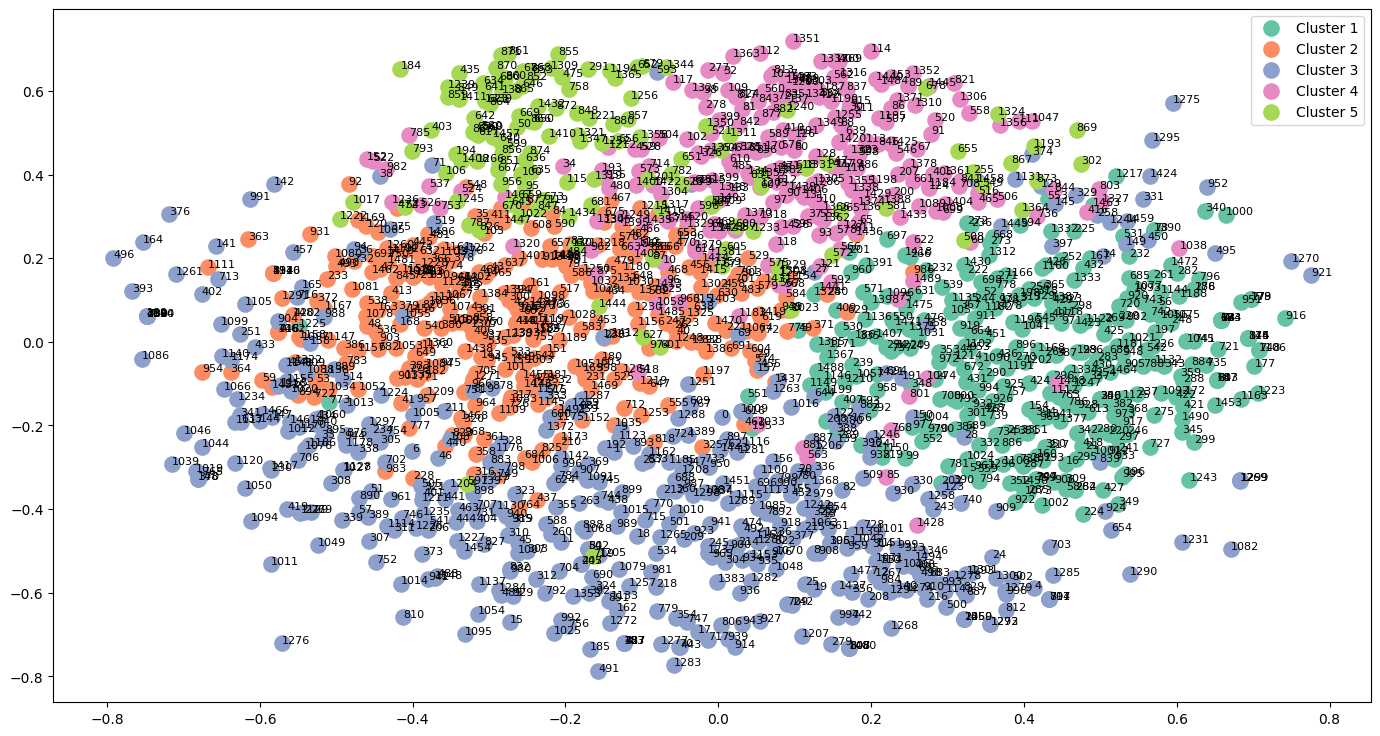

In [12]:
# Load your DataFrame
df = pd.read_csv("modified_dataset.csv")  # Assuming your data is stored in a CSV file

# Preprocess your textual data
text_data = preprocess_text_data(df)

# Generate TF-IDF matrix
tfidf_matrix = generate_tfidf_matrix(text_data)

# Perform K-means clustering
clusters, xs, ys = generate_kmeans_clustering(tfidf_matrix)

# Plot the clusters
plot_clusters(df, clusters, xs, ys, 'kmeans_clusters.png')

## Visualization of similarity clustering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Preprocess the data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
speeches_tfidf = tfidf_vectorizer.fit_transform(df['Speech'])

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
category_encoded = label_encoder.fit_transform(df['Category'])
party_encoded = label_encoder.fit_transform(df['Party'])

In [ ]:
# Concatenate TF-IDF matrix with encoded categorical variables
X = pd.concat([pd.DataFrame(speeches_tfidf.toarray()), pd.DataFrame(category_encoded), pd.DataFrame(party_encoded)], axis=1)

In [ ]:
# Perform k-means clustering
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Add cluster labels to DataFrame
df['cluster'] = clusters

In [ ]:
# Analyze and interpret the clustering results
cluster_analysis = df.groupby('cluster').agg({'Category': pd.Series.mode, 'Party': pd.Series.mode, 'Speech': 'size'})
print(cluster_analysis)

        Category  Party  Speech
cluster                        
0              0      5     650
1         [2, 3]     31     176
2              2     21      78
3              3     10     216
4              2     37      68


In [ ]:
# Create a DataFrame with the cluster assignments and the corresponding category and party
cluster_data = {
    'Cluster': [0, 1, 2, 3, 4],
    'Category': [0, '[2, 3]', 2, 3, 2],
    'Party': [5, 31, 21, 10, 37],
    'Speech': [650, 176, 78, 216, 68]
}

In [ ]:
# Convert the dictionary to a DataFrame
cluster_df = pd.DataFrame(cluster_data)

In [ ]:
# Pivot the DataFrame for visualization
pivot_df = cluster_df.pivot(index='Category', columns='Party', values='Speech')

In [ ]:
speeches_df = pd.read_csv("database.csv")

# Get unique categories from the DataFrame
unique_categories = speeches_df['Category'].unique()

# Iterate over each category and count speeches for each party
for category in unique_categories:
    # Filter the DataFrame for the current category
    speeches_for_category = speeches_df[speeches_df['Category'] == category]

    # Count speeches for each party in the current category
    speeches_count_by_party = speeches_for_category['Party'].value_counts()

    # Print the count of speeches for each party in the current category
    print(f"Category: {category}")
    print(speeches_count_by_party)
    print()


Category: Issue
BJP                                  69
Congress                             28
Shiv Sena                            22
YSR Congress                         17
TMC                                  13
BJD                                  11
JDU                                  10
JKNC                                  9
NCP                                   9
RLP                                   7
TDP                                   7
AIMIM                                 6
BSP                                   6
DMK                                   4
Shiromani Akali Dal                   3
Independent                           3
SP                                    3
Communist Party of India              3
Jharkhand Mukti Morcha                2
All India United Democratic Front     2
VCK                                   1
KECM                                  1
TRS                                   1
PMK                                   1
TPCC                    

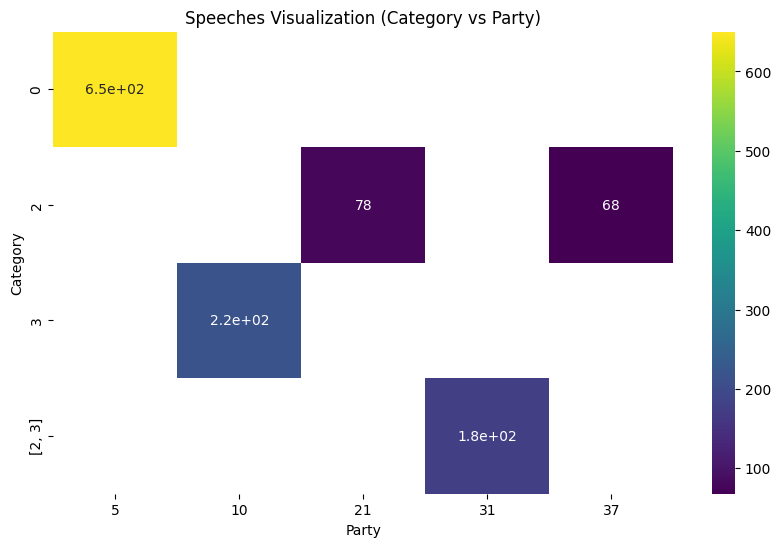

In [ ]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, cmap='viridis', annot=True)
plt.title('Speeches Visualization (Category vs Party)')
plt.xlabel('Party')
plt.ylabel('Category')
plt.show()

## Hierarchical Clustering - WARD

#### Speeches clustered on the basis of party and category

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_new = pd.read_csv("database.csv")

In [ ]:
# Convert speeches into TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_new['Speech'])

In [ ]:
# Calculate pairwise cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)

In [ ]:
# Perform hierarchical clustering using Ward linkage
ward_clusters = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(cosine_sim)

In [ ]:
# Add the cluster labels to the DataFrame
df_new['ward_cluster'] = ward_clusters.labels_

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1000x600 with 0 Axes>

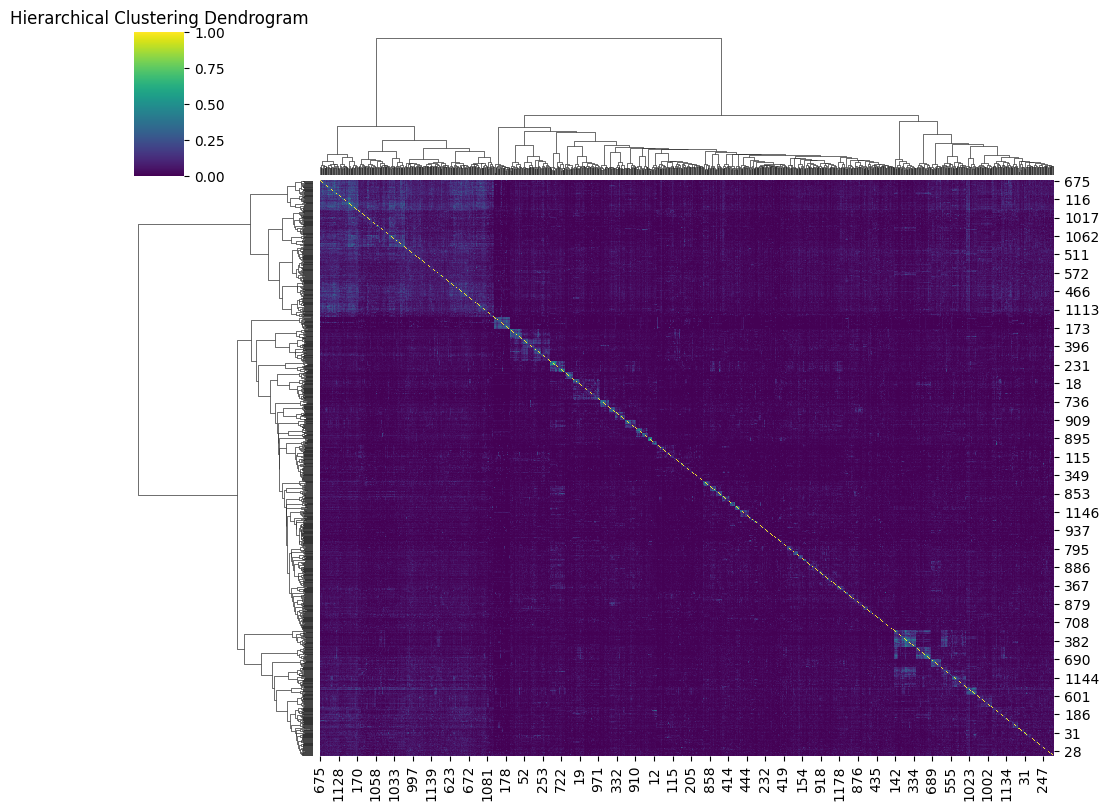

In [ ]:
# Visualize the dendrogram
plt.figure(figsize=(10, 6))
sns.clustermap(cosine_sim, cmap='viridis', method='ward', figsize=(10, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

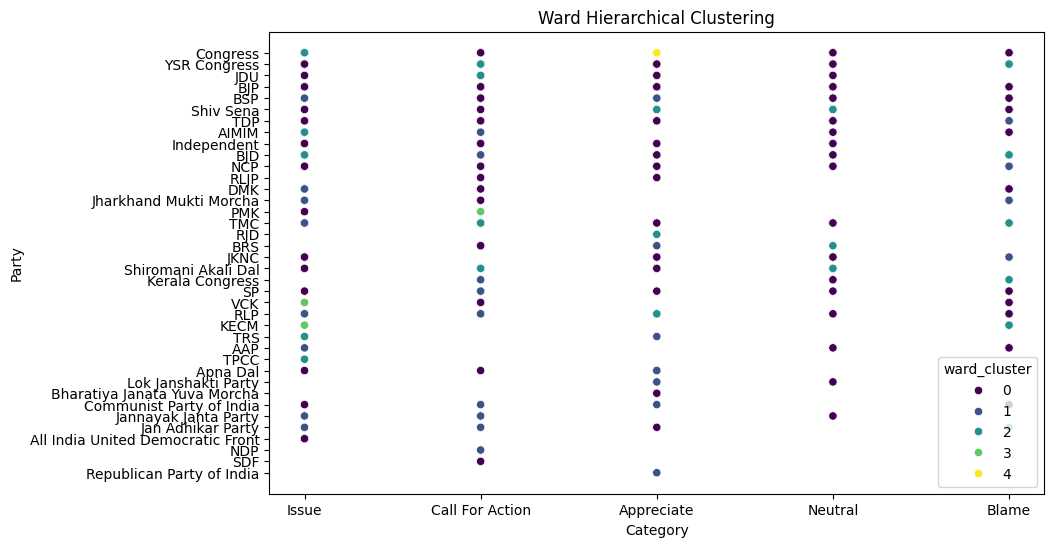

In [ ]:
# Visualize the clustered speeches
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new, x='Category', y='Party', hue='ward_cluster', palette='viridis', legend='full')
plt.title('Ward Hierarchical Clustering')
plt.xlabel('Category')
plt.ylabel('Party')
plt.show()

#### Speeches on the basis of party and year

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
speeches_df = pd.read_csv("database.csv")

In [ ]:
# Extract year from the date column
speeches_df['Year'] = pd.to_datetime(speeches_df['Date']).dt.year

In [ ]:
# Encode the party column
le = LabelEncoder()
speeches_df['Party_Encoded'] = le.fit_transform(speeches_df['Party'])

In [ ]:
# Select features for clustering
X = speeches_df[['Year', 'Party_Encoded']]

In [ ]:
# Perform hierarchical clustering using Ward linkage
ward_clusters = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(X)

In [ ]:
# Add the cluster labels to the DataFrame
speeches_df['ward_cluster'] = ward_clusters.labels_

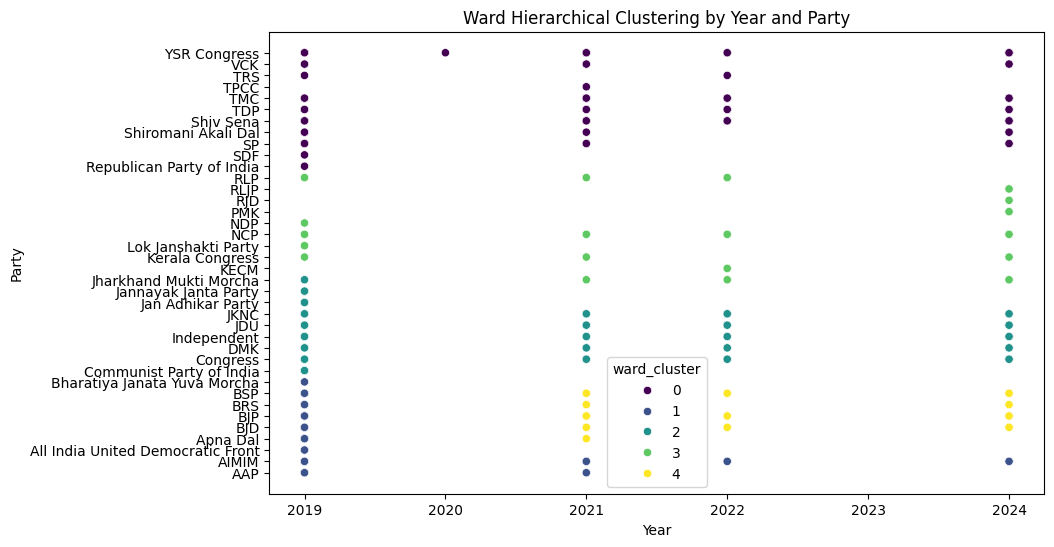

In [ ]:
# Visualize the clustered speeches
plt.figure(figsize=(10, 6))
sns.scatterplot(data=speeches_df, x='Year', y='Party_Encoded', hue='ward_cluster', palette='viridis', legend='full')

# Set y-tick labels to actual party names
plt.yticks(range(len(le.classes_)), le.classes_)

plt.title('Ward Hierarchical Clustering by Year and Party')
plt.xlabel('Year')
plt.ylabel('Party')
plt.show()